Data Awal:
   NO       NAMA SISWA      NISN    NIS          PAI          PKn  \
0   1      Aal Mubaraq  78625451   5318        Cukup        Cukup   
1   2  Abzal Lul Zikri  72511701   5092         Baik         Baik   
2   3  ADEHAM MAULIZAN  86251151  12677  Sangat Baik  Sangat Baik   
3   4    ADELIA SAFIRA  99340413  12944         Baik         Baik   
4   5       Adriansyah  71492013   5093         Baik        Cukup   

            BIN    MTK    SEI    BIG  ...   PJOK          PRA    GEO    SEJ  \
0  Sangat Buruk  Cukup  Cukup  Cukup  ...  Cukup        Cukup  Cukup  Cukup   
1          Baik  Cukup   Baik  Cukup  ...   Baik         Baik  Cukup   Baik   
2          Baik  Cukup  Cukup   Baik  ...   Baik  Sangat Baik   Baik   Baik   
3          Baik   Baik   Baik   Baik  ...   Baik         Baik   Baik   Baik   
4          Baik   Baik   Baik   Baik  ...   Baik         Baik   Baik   Baik   

     Sos    Eko     AA    TIK    BDS    Status Prestasi  
0  Cukup  Cukup  Cukup  Cukup  Cukup  Cuk

KeyboardInterrupt: 

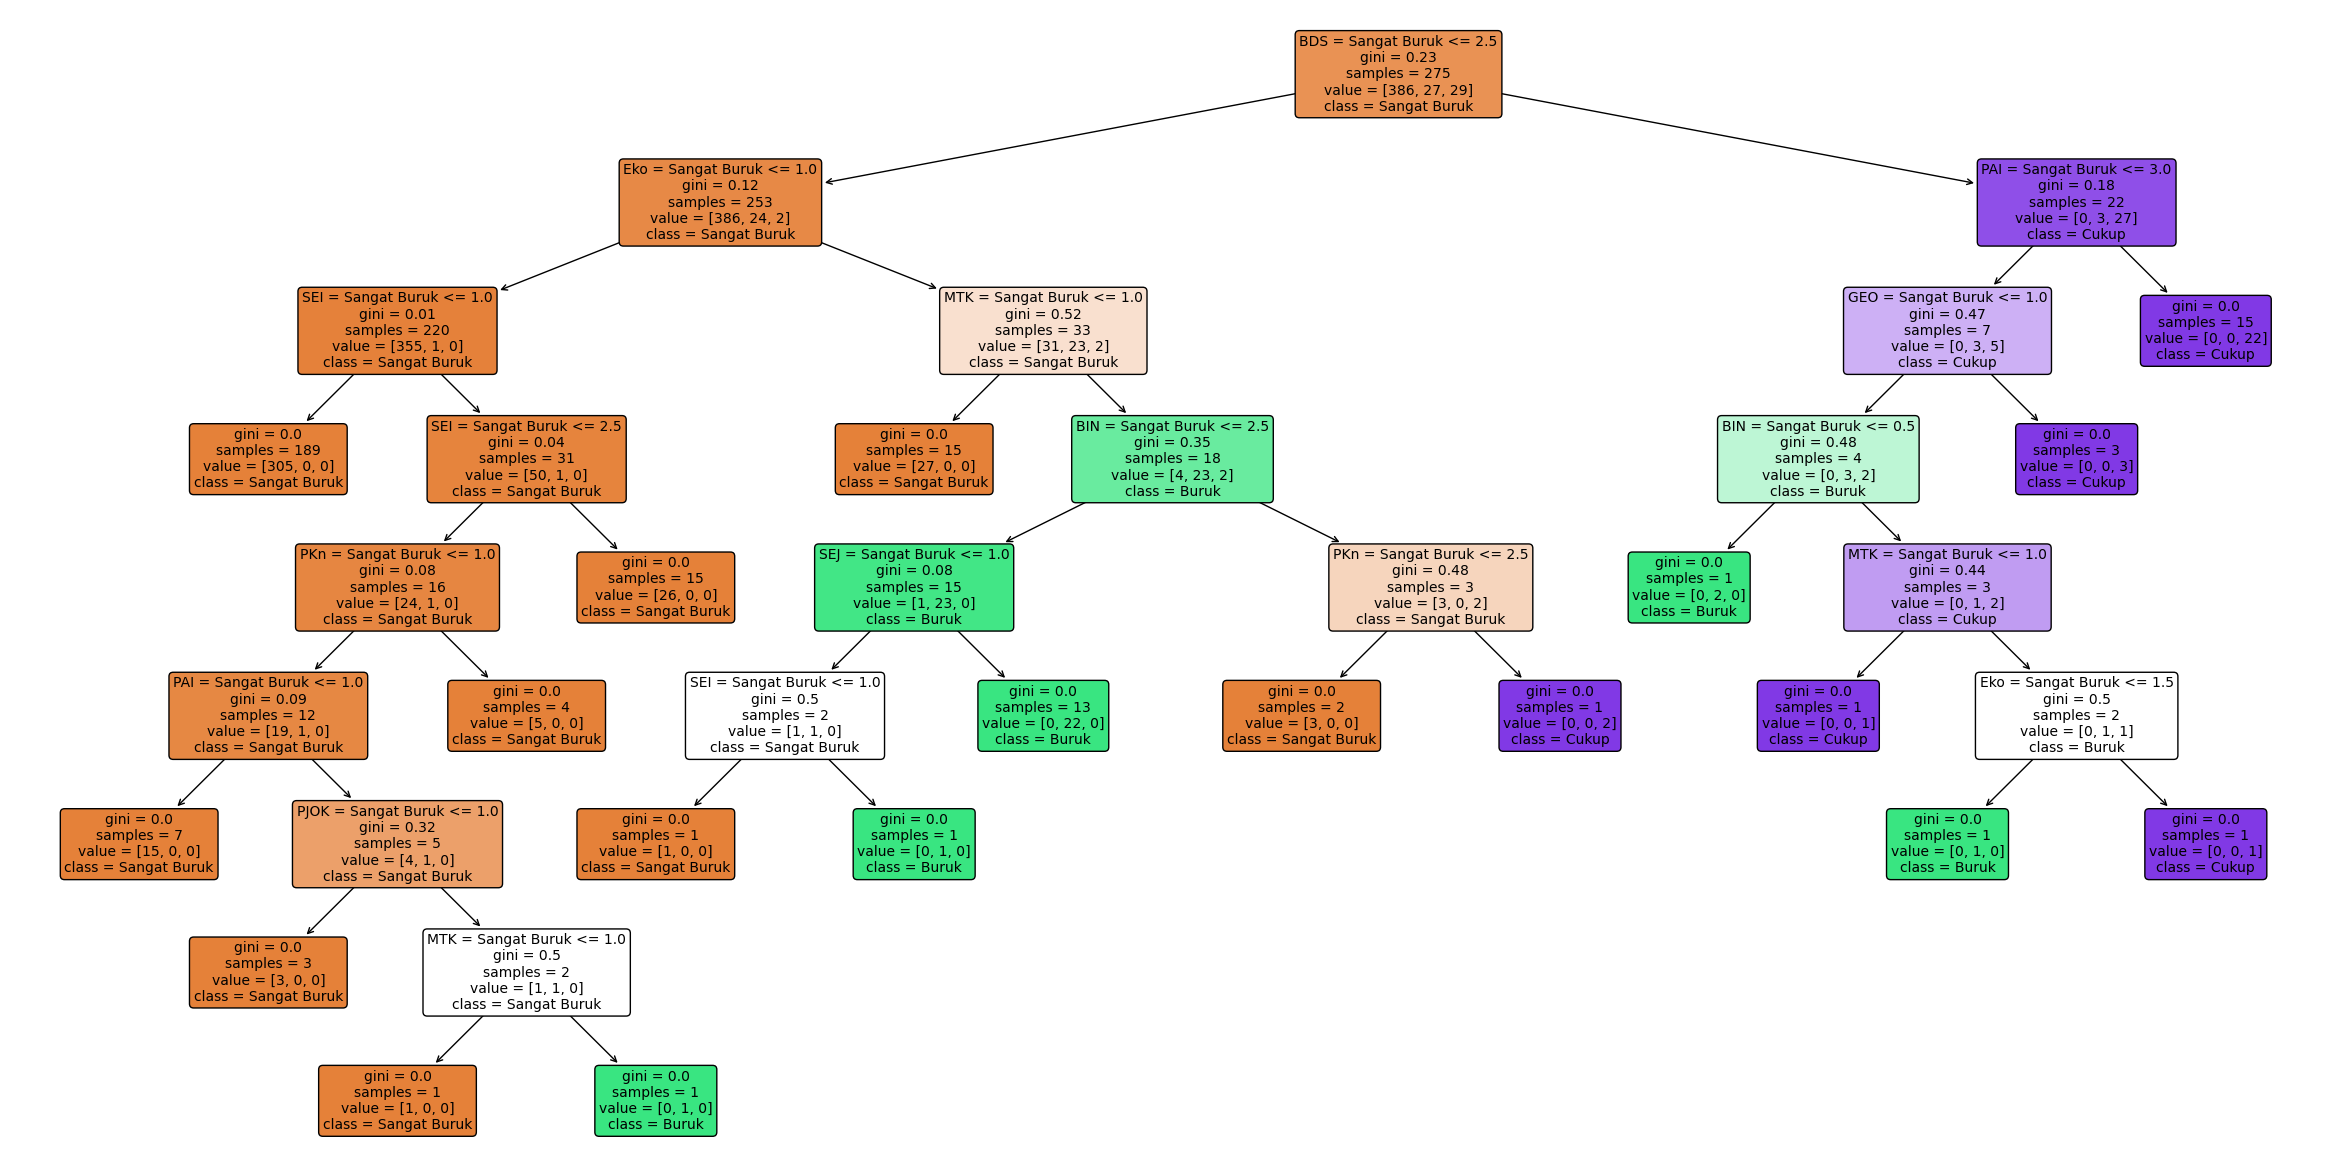

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt

# STEP 1: Membaca Data dari Excel
file_path = 'main_data.xlsx'  # Sesuaikan dengan nama file Anda
data = pd.read_excel(file_path)

# Menampilkan data awal
print("Data Awal:")
print(data.head())

# STEP 2: Preprocessing Data
# Menghapus kolom yang tidak digunakan untuk prediksi
data_cleaned = data.drop(columns=['NO', 'NAMA SISWA', 'NISN', 'NIS'])

# Encoding variabel kategori 'Status Prestasi'
label_encoder = LabelEncoder()
data_cleaned['Status Prestasi'] = label_encoder.fit_transform(data_cleaned['Status Prestasi'])

# Encoding seluruh fitur yang berupa kategori
feature_encoders = {}
for column in data_cleaned.columns[:-1]:  # Ignore the target variable 'Status Prestasi'
    if data_cleaned[column].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        data_cleaned[column] = le.fit_transform(data_cleaned[column])
        feature_encoders[column] = le  # Store the encoder for each feature

# Menampilkan data setelah encoding
print("\nData Setelah Encoding:")
print(data_cleaned.head())

# Pisahkan fitur dan target
X = data_cleaned.drop(columns=['Status Prestasi'])  # Semua kolom kecuali 'Status Prestasi' sebagai fitur
y = data_cleaned['Status Prestasi']  # Targetnya adalah 'Status Prestasi'

# STEP 3: Membagi Data ke Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# STEP 4: Membentuk Model Random Forest dengan Max Depth Maksimal
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=None,  # Tidak ada batasan kedalaman
                                  min_samples_split=2,  # Memungkinkan pembagian lebih dalam
                                  min_samples_leaf=1,  # Memungkinkan daun yang lebih kecil
                                  random_state=42)
rf_model.fit(X_train, y_train)

# Menyimpan model ke file
model_filename = "random_forest_model_max_depth.pkl"
joblib.dump(rf_model, model_filename)
print(f"Model berhasil disimpan ke file: {model_filename}")

# Define a mapping for numerical values to readable labels
label_mapping = {
    0: "Sangat Buruk",
    1: "Buruk",
    2: "Cukup",
    3: "Baik",
    4: "Sangat Baik"
}

# Mapping label asli untuk setiap fitur
label_mapping_per_feature = {
    'PAI': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'PKn': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'BIN': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'MTK': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'SEI': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'BIG': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'SEB': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'PJOK': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'PRA': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'GEO': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'SEJ': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'Sos': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'Eko': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'AA': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'TIK': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik'],
    'BDS': ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik']
}

# Fungsi untuk mengganti label numerik dengan label asli
def replace_labels(feature_name, value):
    if feature_name in label_mapping_per_feature:
        return label_mapping_per_feature[feature_name][value]
    return value

# Menyesuaikan label fitur dengan label asli
adjusted_feature_labels = []
for feature_name in X.columns:
    feature_values = label_mapping_per_feature.get(feature_name, None)
    if feature_values:
        adjusted_feature_labels.append(f"{feature_name} = {replace_labels(feature_name, 0)}")
    else:
        adjusted_feature_labels.append(feature_name)  # If no mapping is found, use the feature name as it is

# STEP 5: Menyimpan Rule dari Setiap Pohon Keputusan dan Visualisasi
if not os.path.exists('tree_visualization'):
    os.makedirs('tree_visualization')

rule_filename = 'tree_visualization/rules.txt'
with open(rule_filename, 'w') as f:
    for i, tree in enumerate(rf_model.estimators_):
        # Export the rules of the decision tree with readable categories
        tree_rules = export_text(tree, feature_names=adjusted_feature_labels)
        f.write(f"Rules for Tree {i+1}:\n")
        f.write(tree_rules)
        f.write("\n" + "="*50 + "\n")

        # Visualize the tree with readable labels for each decision point
        plt.figure(figsize=(30, 15))  # Widen the tree
        plot_tree(
            tree, 
            filled=True, 
            feature_names=adjusted_feature_labels, 
            class_names=[label_mapping[class_id] for class_id in range(len(label_encoder.classes_))], 
            rounded=True, 
            proportion=False, 
            precision=2,
            fontsize=10  # Smaller font size to fit labels
        )
        plt.savefig(f"tree_visualization/tree_{i+1}.png")
        plt.close()

# STEP 6: Evaluasi Model (optional for checking model performance on test set)
y_pred = rf_model.predict(X_test)

# Menampilkan classification report dan confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# STEP 7: Memuat Model yang Sudah Ada (jika diperlukan)
rf_model = joblib.load(model_filename)
print(f"Model berhasil dimuat dari file: {model_filename}")
